In [1]:
# Modues to be used
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime

In [2]:
# Load data from pickle files

# -> Player dictionary with the dataFrames
f = open('data/dict_player.pickle', 'rb')
dict_player = pickle.load(f)

# -> Map dataFrames
f = open('data/df_map.pickle','rb')
df_map = pickle.load(f)

# -> Map dictionary
f = open('data/dict_map.pickle','rb')
dict_map = pickle.load(f)

In [40]:
dict_player[player_id].head().keys()

Index(['map', 'date', 'team_id', 'team_name', 'player_id', 'player_name',
       'kills', 'hs_kills', 'assists', 'flash_assists', 'deaths', 'KAST',
       'kill_death_diff', 'ADR', 'first_kills_diff', 'rating',
       'kills_per_round', 'deaths_per_round', 'impact', 'team_score',
       'op_score', 'win', 'team_rank', 'prize'],
      dtype='object')

In [11]:
# First we take all the players in ranked teams from 2019
player_aux = {}

for player_id in dict_player:
    df_aux = dict_player[player_id][ dict_player[player_id]['date']>datetime(2019,1,1) ]

    if any( df_aux['team_rank']>0 ):
        player_aux[player_id] = {}

        prize = sum( df_aux['prize'] )
        if prize > 0.0:
            player_aux[player_id]['prize'] = np.log( prize ) / 12.0
        else:
            player_aux[player_id]['prize'] = 0.0

        player_aux[player_id]['rating']           = df_aux['rating'].mean()
        player_aux[player_id]['hs_perc']          = (df_aux['hs_kills']/df_aux['kills']).mean()
        player_aux[player_id]['kills_per_round']  = df_aux['kills_per_round'].mean()
        player_aux[player_id]['deaths_per_round'] = df_aux['deaths_per_round'].mean()
        player_aux[player_id]['ADR']              = df_aux['ADR'].mean()

        # print( df_aux['player_name'].unique() )


In [17]:
# Using Euclidean distance
player_id = 7998

df = pd.DataFrame.from_dict(player_aux,orient='index')

# df.prize = (df.prize - df.prize.mean()) / df.prize.std()
# df.rating = (df.rating - df.rating.mean()) / df.rating.std()
# df.head()

for column in df:
    df[column] = (df[column] - df[column].mean()) / df[column].std()
    
df_dist = df.copy()
df_dist['dist'] = df['rating']*0.0
for column in df:
    df_dist[column] = (df[column]-df.loc[player_id][column])**2
    df_dist['dist'] = df_dist['dist'] + df_dist[column]



df_dist = df_dist.sort_values('dist',ascending=True)
for player_id in df_dist.index[:50]:
    print( dict_player[player_id].player_name.unique() )

df_dist.head()

['s1mple']
['ZywOo']
['Emy']
['INS']
['BnTeT']
['dexter']
['electronic']
['xeta']
['vsm']
['Benkai']
['splashske']
['floppy']
['yuurih']
['dezon']
['ropz']
['EliGE']
['NAF']
['erkaSt']
['d4v41']
['device']
['Kaze']
['huNter' 'huNter-']
['mantuu']
['Bubzkji']
['Brehze']
['refinnej']
['Magisk']
['adaro']
['rain']
['blameF']
['detinate']
['mitsuha']
['KSCERATO']
['Hatz']
['PTC']
['Infinite']
['GooseBreeder']
['mimi']
['hardzao']
['frozen']
['zorte']
['bENITA']
['meyern']
['Jamppi']
['decov9jse']
['allee']
['CAth']
['Tony']
['somedieyoung']
['poizon']


,prize,rating,hs_perc,kills_per_round,deaths_per_round,ADR,dist
7998,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
11893,0.022191,0.051147,0.232547,0.005181,0.000772,0.026647,0.338484
14401,0.149162,0.185793,0.178240,0.440385,0.428542,0.002703,1.384825
11140,0.409338,0.261034,0.034546,0.623615,0.161540,0.000151,1.490224
7131,0.098690,0.373684,0.030225,1.101629,0.018068,0.050536,1.672833


In [24]:
df.keys()

Index(['prize', 'rating', 'hs_perc', 'kills_per_round', 'deaths_per_round',
       'ADR'],
      dtype='object')

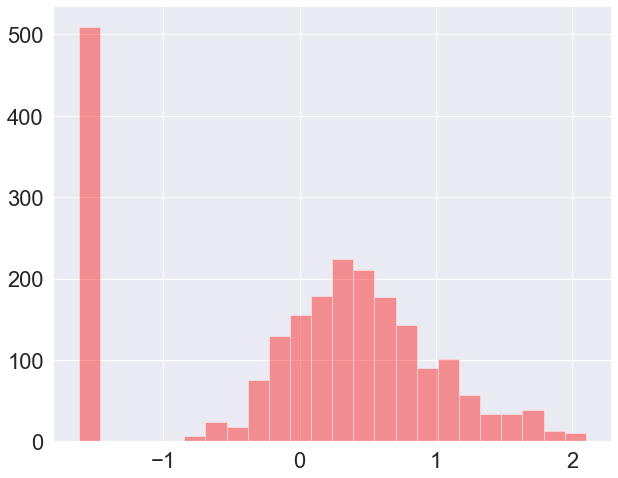

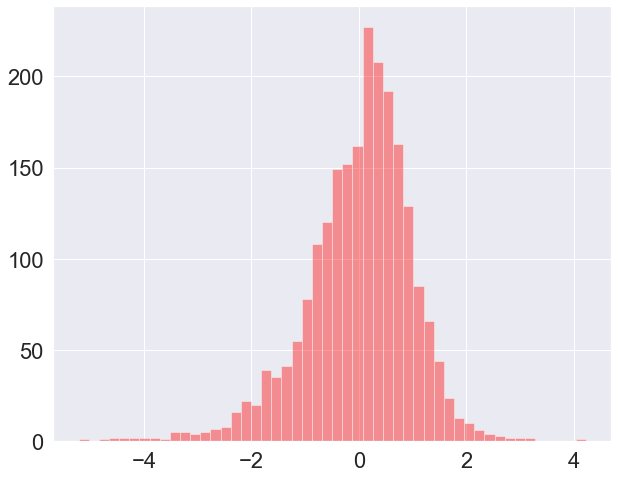

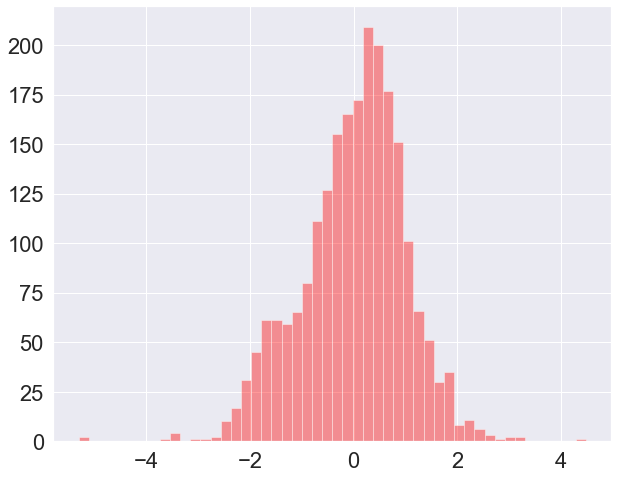

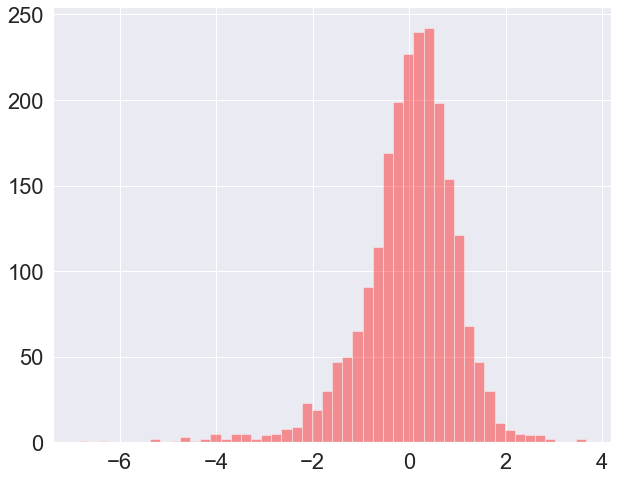

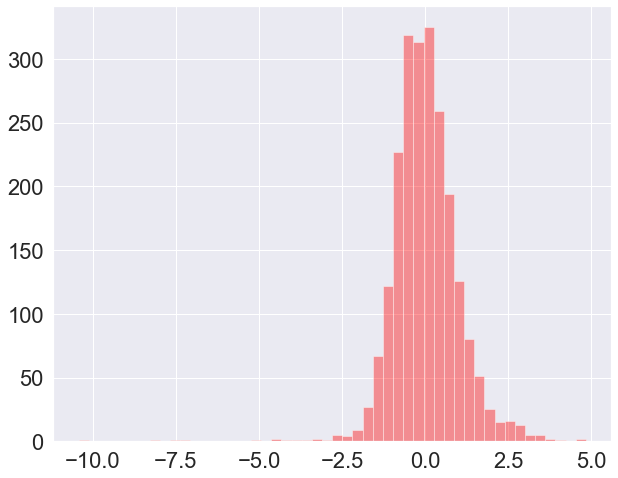

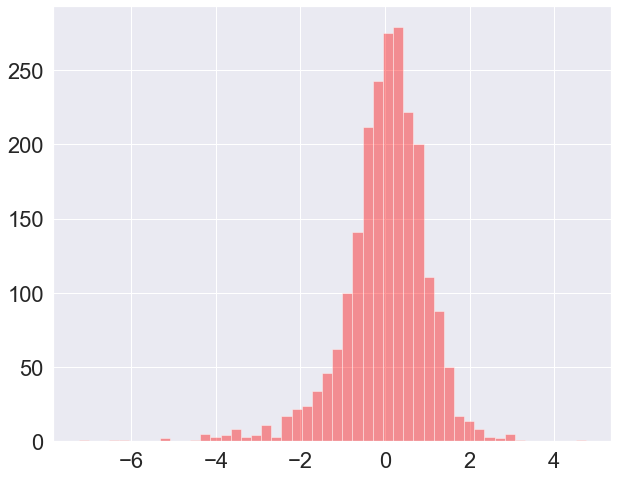

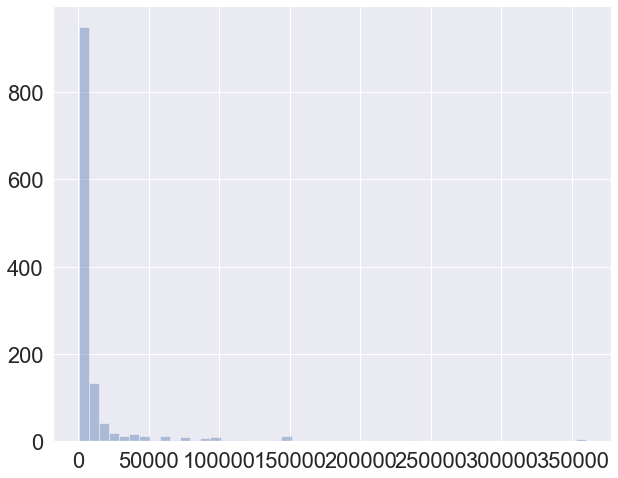

In [42]:
df_aux = pd.DataFrame.from_dict(player_aux,orient='index')
# df_aux.hist()



%matplotlib qt
%matplotlib inline

sns.set_style("whitegrid")
sns.set(font_scale=2)

for column in df:
    plt.figure(figsize=(10,8))
    x = df[column].values
    sns.distplot(x,kde=False,color='red')
    # sns.kdeplot(x, shade=True);


plt.figure(figsize=(10,8))
x = np.exp( 12.0*df_aux[df_aux['prize']>0.5]['prize'].values )
sns.distplot(x,kde=False)

In [31]:
sns.set_style("whitegrid")
sns.set(font_scale=2)

plt.figure(figsize=(10,8))
# ax1 = sns.scatterplot(data=data_tmp,x='win',y='ADR')

sns.scatterplot(data=df,x='rating',y='prize',size='ADR',hue='hs_perc')
# plt.title('Data from 2019');
# plt.xlabel('Win Percentage');
# plt.ylabel('Average Team Damage per Round');

In [0]:
# Using Cosine Similarity
player_id = 7998

df = pd.DataFrame.from_dict(player_aux,orient='index')

df.prize = (df.prize - df.prize.mean()) / df.prize.std()
df.rating = (df.rating - df.rating.mean()) / df.rating.std()
df.head()

for column in df:
    df[column] = (df[column] - df[column].mean()) / df[column].std()
    
df_dist = df
df_dist['dist'] = df['rating']*0.0


#norm_y = 0.0
df_dist['norm_x'] = df_dist['dist']*0.0
for column in df:
    df_dist['norm_x'] = df_dist['norm_x'] + df_dist[column]**2

df_dist['norm_x'] = np.sqrt( df_dist['norm_x'] )


for column in df:
    df_dist[column] = df[column]*df_dist.loc[player_id][column] / (df_dist['norm_x']*df_dist.loc[player_id][column])
    df_dist['dist'] = df_dist['dist'] + df_dist[column]



df_dist = df_dist.sort_values('dist',ascending=False)
for player_id in df_dist.index[:50]:
    print( dict_player[player_id].player_name.unique() )

df_dist.head()

In [0]:
dict_player[13230]